In [2]:

mainQuery= {
    "greeting": ["hi", "hello", "how are you?"],
    "covid": ["covid", "covid-19", "covid19", "sars-cov"],
    "tuberculosis": ['tuberculosis', 'tb'],
    "asthma" : ["asthma"],
    "nocontext": [""],
    "endNote": ["Thank you", "This was helpful!", "See you later!"]
}
context1 = {
    "diagnosis":["if i have", "if he has", "if she has", "if they have", "diagnosis"],
    "medications": ["treatment", "medications", "medicine"],
    "symptoms":["symptoms"],
    "types":["types", "variants", "stages"],
    "nocontext":[""]
}

context2= {
    "sideeffects":["side effects", "careful", "effects"],
    "duration": ["how long", "duration"],
    "nocontext":[""]
}

actions= {
    "greeting": ["Hello"],
    "whatCanIhelp":["Sure, what can I help you with"],
    "asthmaDef": ["Asthma is a disease that affects your lungs. It is one of the most common long-term diseases of children, but adults can have asthma, too. Asthma causes wheezing, breathlessness, chest tightness, and coughing at night or early in the morning. "],
    "covidDef": ["Coronaviruses are a family of viruses that can cause respiratory illness in humans. They are called “corona” because of crown-like spikes on the surface of the virus."],
    "tbDef": ["Tuberculosis (TB) is a bacterial infection spread through inhaling tiny droplets from the coughs or sneezes of an infected person. It mainly affects the lungs, but it can affect any part of the body, including the tummy (abdomen), glands, bones and nervous system."],
    "endNote": ["Thanks for chatting"],
    "covidDiag":["Covid is most accurately detected using PCR tests."],
    "asthmaDiag":["There are 2 main tests to diagnose Asthma: FeNo and Spirometry"],
    "tbDiag":["There are two basic tests used for TB. TB Skin Test and TB Blood Test."],
    "noContext": ["Sorry didnt understand the question. please specify in details or try rephrasing."],
    "covidvariants": ["Sars-Cov-2 has had many circulating virus namely Alpha, Beta, Gamma, Delta and Omicron"],
    "ashtmavariants": ["Asthma has these common types: Allergic Asthma, Non-allergic Asthma, Cough-variant asthma, Noturnal and Occupational Asthma"],
    "tbvariants":["There are two types of TB conditions: TB disease and latent TB infection. "],
    "covidMeds": ["Scientists around the world are working to find and develop treatments for COVID-19. However preventive vaccinations are commonly available."],
    "tbMeds": ["The most common treatment for active TB is isoniazid INH in combination with three other drugs—rifampin, pyrazinamide and ethambutol."],
    "asthmaMeds":["There's currently no cure for asthma, but treatment can help control the symptoms so you're able to live a normal, active life. Inhalers, which are devices that let you breathe in medicine, are the main treatment. Tablets and other treatments may also be needed if your asthma is severe."],
    "asthmaduration": ["Asthma symptoms can show up for a few times a month to several times a day/"],
    "covidDuration":["Generally covid lasts for about 2 weeks."],
    "tbduration": ["TB treatment can take anywhere between 6 to 9 months"],
    "asthmaMedSide": ["The most common side effects of inhaled preventer medication (inhaled corticosteroids) are a hoarse voice, sore mouth and throat, and fungal infections of the throat. "],
    "covidMedSide":["Covid Vaccination has minor side effects ranging for mild fever and weakness"],
    "tbMedSide":["some side effects of TB treatments are itchy skin ,skin rashes, bruising or yellow skin, upset stomach, nausea, vomiting, diarrhoea or loss of appetite"],
    "asthmaSymptoms":["Asthma attacks signs include wheezing, coughing and chest tightness becoming severe and constant, being too breathless to eat, speak or sleep, drowsiness, confusion, exhaustion or dizziness"],
    "covidSymptoms":["Most common symptoms of covid are fever, cough, tiredness,loss of taste or smell"],
    "tbSymptoms":["Some symptoms of TB are a persistent cough that lasts more than 3 weeks and usually brings up phlegm, which may be bloody, weight loss, night sweats, high temperature, tiredness and fatigue."],
    "unrelated": ["sorry I can only answer for question I am allowed to."],
}


In [3]:
diseaseaseContext="nocontext"
contexta="nocontext"
contextb="nocontext"
def getContext(text, prevContext):
    text=text.lower()
    keys= list(prevContext)
    for key in mainQuery:
        for keyword in mainQuery[key]:
            if keyword.lower() in text:
                if key=="nocontext":
                    continue
                keys[0]=key
                break
        else:
            continue
        break
    for key in context1:
        for keyword in context1[key]:
            if keyword.lower()  in text:
                if key=="nocontext":
                    continue
                keys[3]=key
                break
        else:
            continue
        break
    for key in context2:
        for keyword in context2[key]:
            if keyword.lower()  in text:
                if key=="nocontext":
                    continue
                keys[4]=key
                break
        else:
            continue
        break
    return (keys[0], keys[1], keys[2], keys[3], keys[4])


In [4]:
states= list()
for key in sorted(mainQuery):
    for context in sorted(context1):
        for  intent1 in sorted(context2):
            for intents2 in sorted(context1):
                for intent3 in sorted(context2):
                    states.append((key, context, intent1, intents2, intent3))
print(states[7])

('asthma', 'diagnosis', 'duration', 'nocontext', 'nocontext')


In [5]:
print (len(states))
print (len(actions))



1350
26


In [6]:
import numpy as np

#set up  mapping and inverse mapping to find corresponeding state or number
numbertoState=dict()
statetoNumber=dict()
for i,state in enumerate(states):
    numbertoState[i]= state
    statetoNumber[state]=i
numbertoAction=dict()
actiontoNumber=dict()
for i,action in enumerate(actions):
    numbertoAction[i]= action
    actiontoNumber[action]=i



In [7]:
#reward map----- old state to new state reward
reward= np.zeros((len(states), len(states)),dtype=float)
print(reward.shape)
# since we know we have to somehow end the convo. lets set maximum reward if the next state is ending the convo
for i,lastState in enumerate(states):
    for j,nextState in enumerate(states):
        if "endNote" in nextState:
            reward[i][j] =1


(1350, 1350)


In [8]:
qTable= np.zeros((len(states), len(actions)), dtype=float)
with open('test.npy','rb')as f:
    f.seek(0)
    loadedFile=np.load(f ,allow_pickle=False)
    if loadedFile.shape== qTable.shape:
        pass
        qTable=loadedFile
        print("Loaded old backup")

Loaded old backup


Qtable Training

In [71]:
import random
#start q learn algo
# Initialize parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate 
epsilon = 0.1
next_stateIndex=0
stateIndex=0
actionNumber=0
episodeRun=True
reward=0

prevContext= ("nocontext", "nocontext", "nocontext")
prevState=statetoNumber[prevContext]
while episodeRun:

    text=input("")
    state=getContext(text, numbertoState[prevState])
    stateIndex=statetoNumber[state]

    next_max = np.max(qTable[stateIndex])
    
    old_value = qTable[prevState][actionNumber]
    print(old_value)
    new_value=(1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    
    qTable[prevState][actionNumber] = new_value

    prevState=stateIndex
    print(numbertoState[stateIndex])

    if np.random.uniform(0, 1) < epsilon:
            actionNumber = random.randint(0,len(actions))# Explore action space
    else:
            actionNumber= np.argmax(qTable[stateIndex]) # Exploit learned values

    print(actions[numbertoAction[actionNumber]])
        
    feedback=input("Helpful Y/N? or Quit Q").lower()
    if feedback=='y':
        reward=1
    elif feedback=='n':
        reward=-1
    else:
        episodeRun=False

#print(qTable)


0.0
('greeting', 'nocontext', 'nocontext')
['Hello']
0.0
('covid', 'nocontext', 'nocontext')
['Hello']
0.0
('covid', 'nocontext', 'nocontext')
['Hello']
0.0
('covid', 'nocontext', 'nocontext')
['Hello']


Text(0.5, 1.0, 'Matplotlib PLot NumPy Array')

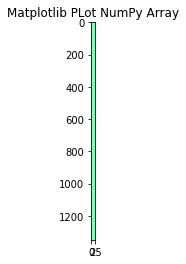

In [9]:
#plot the map to see differences
import matplotlib.pyplot as plt
plt.imshow( qTable, cmap = 'rainbow' , interpolation = 'bilinear')
plt.title("Matplotlib PLot NumPy Array") 

In [ ]:
with open('test.npy', 'wb') as f:
    np.save(f, qTable)

In [11]:
print (qTable[100])
print(numbertoState[33])
print(numbertoAction[np.argmax(qTable[33])])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
('asthma', 'diagnosis', 'sideeffects', 'medications', 'duration')
greeting
